In [ ]:
%pylab inline
plt.style.use('dark_background')
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

# Object-Ramp (X,Y) Position Update 

here:  -1.5611995216165924
Time (delta_t=0.5) :  [0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.030000000000000002, 0.035, 0.04, 0.045, 0.049999999999999996, 0.05499999999999999, 0.05999999999999999, 0.06499999999999999, 0.06999999999999999, 0.075, 0.08, 0.085, 0.09000000000000001, 0.09500000000000001, 0.10000000000000002, 0.10500000000000002, 0.11000000000000003, 0.11500000000000003, 0.12000000000000004, 0.12500000000000003, 0.13000000000000003, 0.13500000000000004, 0.14000000000000004, 0.14500000000000005]
X positon at time t:  [0.0, -0.0245, -0.07350000000000001, -0.14700000000000002, -0.24500000000000002, -0.36750000000000005, -0.5145000000000001, -0.6860000000000002, -0.8820000000000001, -1.1025, -1.3475000000000001, -1.617, -1.911, -2.2295, -2.5725, -2.94, -3.332, -3.7485, -4.1895, -4.655, -5.1450000000000005, -5.6595, -6.198500000000001, -6.762000000000001, -7.350000000000001, -7.962500000000001, -8.5995, -9.261000000000001, -9.947000000000001, -10.6575]
y positon at time t:  [10.0, 9.9

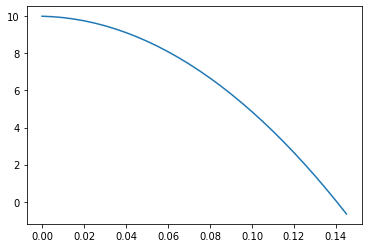

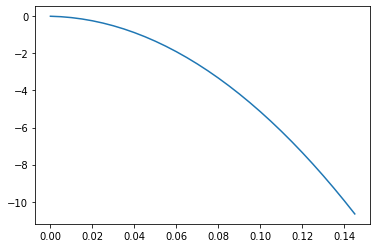

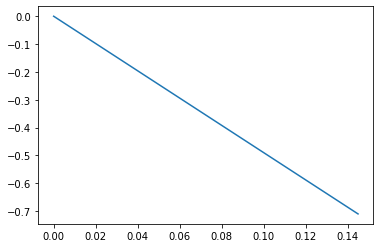

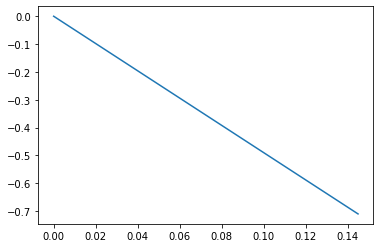

In [29]:
#import time
import numpy as np

'''
Object-Ramp Position Update
'''
ramp_positions = []
time_intervals = []
x_positions = []
y_positions = []
x_velocity = []
y_velocity = []

delta_t = .005
g = -9.8
t = 0
theta = np.pi / 4

# pose = np.ndarray((2,), dtype=float, buffer=np.array([-10/np.tan(theta), 10.0]))
pose = np.ndarray((2,), dtype=float, buffer=np.array([0, 10.0]))
velocity = np.ndarray((2,), dtype=float, buffer=np.array([10.0, 10.0]))


x_accel_along_ramp = g * np.sin(theta)

#                                                                                    
# Transform the accelration along the ramp into x and y coordinates from the ground y|___>x
accel_coordinates = np.array([x_accel_along_ramp * np.cos(theta), x_accel_along_ramp * np.sin(theta)])

print("here: ",10/np.tan(30))

while pose[1] > 0: # Until the object hits the bottom : y = 0
    x_velocity_along_ramp = t * accel_coordinates
    pose = pose + x_velocity_along_ramp
    x_positions.append(pose[0])
    y_positions.append(pose[1])
    x_velocity.append(x_velocity_along_ramp[0])
    y_velocity.append(x_velocity_along_ramp[1])
    time_intervals.append((t))
    t = t + delta_t


import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation



print("Time (delta_t=0.5) : ", time_intervals)
print("X positon at time t: ", x_positions)
print("y positon at time t: ", y_positions)

plt.plot(time_intervals, y_positions)

plt.show()

plt.plot(time_intervals, x_positions)

plt.show()


plt.plot(time_intervals, x_velocity)

plt.show()


plt.plot(time_intervals, y_velocity)

plt.show()

### Running the simulator

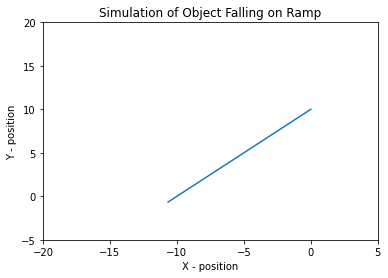

In [28]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML

fig, ax = plt.subplots()
ax.set_xlim(-20, 5)
ax.set_ylim(-5, 20)
line, = ax.plot(0, 0)

x_data = []
y_data = []
def animation_frame(i):
	x_data.append(x_positions[i])
	y_data.append(y_positions[i])

	line.set_xdata(x_data)
	line.set_ydata(y_data)
	return line,

# interval is time delay (ie every 10 miliseconds )
animation = FuncAnimation(fig, func=animation_frame, frames=np.arange(0, len(time_intervals), 1), interval=5)
plt.title('Simulation of Object Falling on Ramp')
plt.xlabel('X - position')
plt.ylabel('Y - position')

HTML(animation.to_jshtml())